In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./mavlink_local_position_ned_t.csv')
df['date_time'] = pd.to_datetime(df['Time'])
df['unix_time'] = df['date_time'].apply(lambda x: x.timestamp())
df['rel_time'] = df['unix_time'].apply(lambda x: x - df['unix_time'][0])

In [3]:
#TODO: Figure out which formula is more accurate

# Calculate distance in each direction
df['distance_x'] = np.sqrt((df['x']-df['x'][0])**2)
df['distance_y'] = np.sqrt((df['y']-df['y'][0])**2)
df['distance_z'] = np.sqrt((df['z']-df['z'][0])**2)
# df['distance_x'] = np.sqrt(df['x']**2)
# df['distance_y'] = np.sqrt(df['y']**2)
# df['distance_z'] = np.sqrt(df['z']**2)

# Calculate total distance
df['total_distance'] = np.sqrt((df['x']-df['x'][0])**2 + (df['y']-df['y'][0])**2 + (df['z']-df['z'][0])**2)
# df['total_distance'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

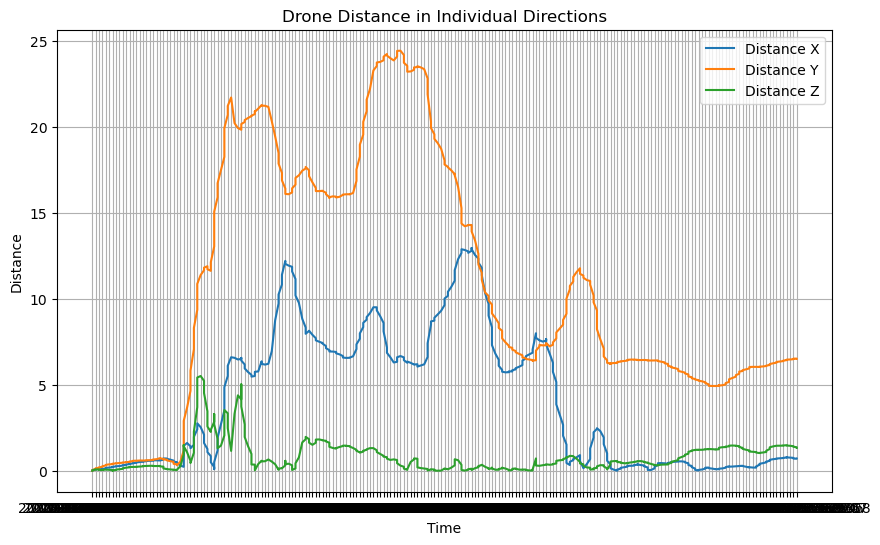

In [4]:
plt.figure(figsize=(10, 6))

plt.plot(df['Time'], df['distance_x'], label='Distance X')
plt.plot(df['Time'], df['distance_y'], label='Distance Y')
plt.plot(df['Time'], df['distance_z'], label='Distance Z')

plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Drone Distance in Individual Directions')
plt.legend()
plt.grid(True)

plt.show()

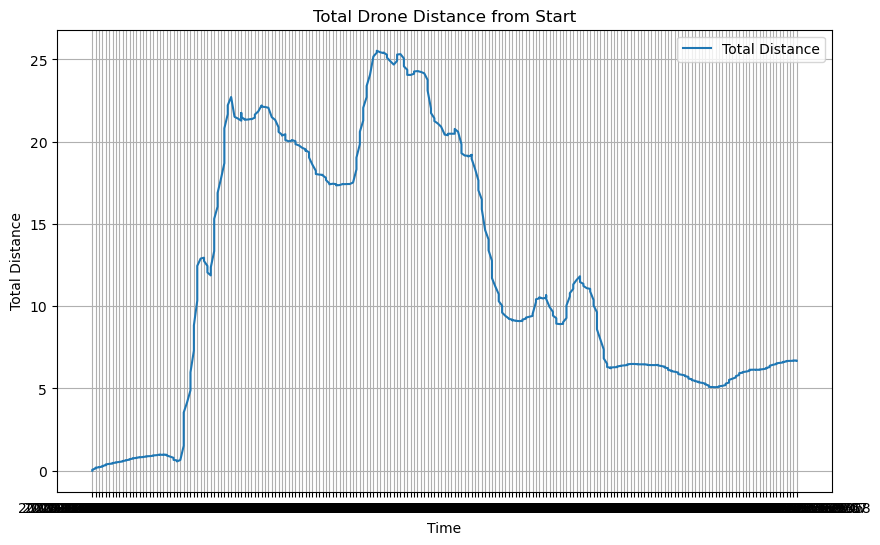

In [5]:
plt.figure(figsize=(10, 6))

plt.plot(df['Time'], df['total_distance'], label='Total Distance')

plt.xlabel('Time')
plt.ylabel('Total Distance')
plt.title('Total Drone Distance from Start')
plt.legend()
plt.grid(True)

plt.show()
